# Modulations PAM d'une séquence particulière

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('../../_static/graph.mplstyle')

In [2]:
msg = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
N = len(msg)
d = 1
tb = np.arange(0, d, d/100)

signals = {
    "RZ"   : [],
    "OOK"  : [],
    "BPSK" : [],
    "NRZI" : []
}
for s in signals:
    
    if s == "RZ":
        x = np.array([])
        h = np.where(tb<d/2, 1, 0)
        for m in msg:
            xn = -h if m==0 else h
            x = np.append(x, xn)
    
    if s == "OOK":
        x = np.array([])
        h = np.sin(2*np.pi*tb*4)
        for m in msg:
            if m==0:
                xn = 0*h
            else:
                xn = 1*h
            x = np.append(x, xn)
    
    if s == "BPSK":
        x = np.array([])
        h = np.sin(2*np.pi*tb*4)
        for m in msg:
            if m==0:
                xn = -h
            else:
                xn = +h
            x = np.append(x, xn)
    
    if s == "NRZI":
        x = np.array([])
        xn = np.where(tb<d, -1, 0)
        for m in msg:
            if m==0:
                xn = -xn
            else:
                xn = xn
            x = np.append(x, xn)
    
    signals[s] = x

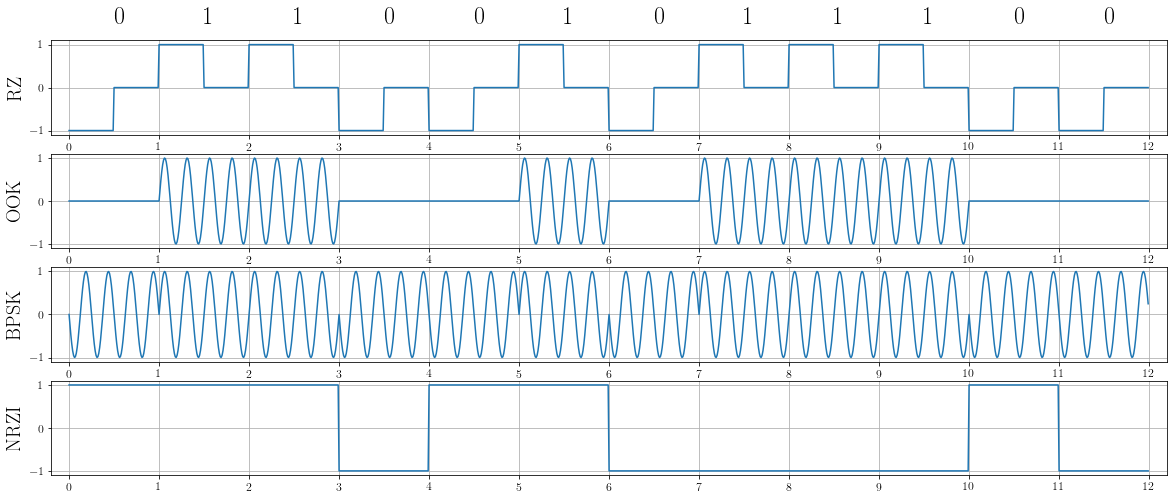

In [3]:
# Affichage
t = np.arange(0, N*d, d/100)
fig, axs = plt.subplots(4,1, figsize=(20,8))

for i, s in enumerate(signals):
    
    x = signals[s]
    ax = axs[i]
    ax.plot(t, x)
    ax.set_ylabel(s, fontsize=20)
    ax.set_xticks(np.arange(0,N+1))
    ax.set_xlim([-.2, N+.2])
    
    if i==0:
        for j, m in enumerate(msg):
            ax.text(j+.5, 1.5, f"{m}", fontsize=24)
    
plt.savefig(f"exo-modulation.svg")
plt.show()